# EMA EV Test - connect Vensim Model

* and test out some scenario discovery visualisations

In [3]:
# Import necessary libraries
from ema_workbench import (
    RealParameter,
    TimeSeriesOutcome,
    ema_logging,
    perform_experiments,
)
from ema_workbench.connectors.vensim import VensimModel

from ema_workbench import save_results, load_results

import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
# Set up and run the experiments
if __name__ == "__main__": 
    # turn on logging
    ema_logging.log_to_stderr(ema_logging.INFO) 

    # instantiate a model
    wd = "./model_files/" # adjust this path to load different version of model
    vensim_model = VensimModel("evmodel", wd=wd, model_file="24_09 Carageing_emissions_utility.vpmx")
    vensim_model.uncertainties = [
        RealParameter("Avg car sales[FossilVehicle]", 3000, 7000),
        RealParameter("Avg car sales[ElectricVehicle]", 500, 1500),
    ]

    vensim_model.outcomes = [
        TimeSeriesOutcome("Number of EVs"),
        TimeSeriesOutcome("Total CO2 emissions cars[FossilVehicle]"),
        ]

    results = perform_experiments(vensim_model, 1000)

[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
100%|██████████████████████████████████████| 1000/1000 [00:25<00:00, 39.38it/s]
[MainProcess/INFO] experiments finished


In [5]:
# split results into experiments and outcomes
experiments, outcomes = results

#### Save/load results

In [ ]:
# Save results  
save_results(results, "./results/ev_results.tar.gz")

c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\em_framework\outcomes.py:541: UserWarning: still to be tested!!
  warnings.warn("still to be tested!!")
[MainProcess/INFO] results saved successfully to c:\Users\Amber Rozenberg\Documents\0. Julia\Curacao EV\curacao_ev\results\ev_results.tar.gz


In [2]:
# Load results
experiments, outcomes = load_results("./results/ev_results.tar.gz")

NameError: name 'load_results' is not defined

### Pairplot

c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\analysis\prim.py:32: ImportWarning: altair based interactive inspection not available
  warnings.warn("altair based interactive inspection not available", ImportWarning)


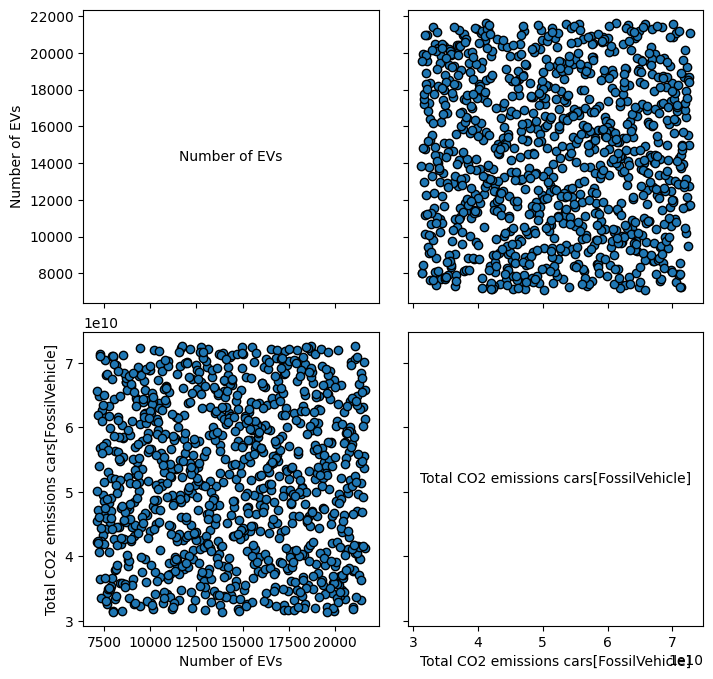

In [6]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(
    experiments, outcomes, legend=False
)
fig.set_size_inches(8, 8)
plt.show()

### Patient-Rule Induction Method (PRIM)

In [7]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes["Number of EVs"].mean(axis=1) < 10000
print(type(y), y.shape, y.dtype)
print(y[:10])


<class 'numpy.ndarray'> (1000,) bool
[False False False False False False False False False False]


In [9]:
prim_alg = prim.Prim(x, y, threshold=0.8, mode=prim.RuleInductionType.BINARY)
box1 = prim_alg.find_box()

AttributeError: module 'ema_workbench.analysis.prim' has no attribute 'RuleInductionType'

### Feature Scoring

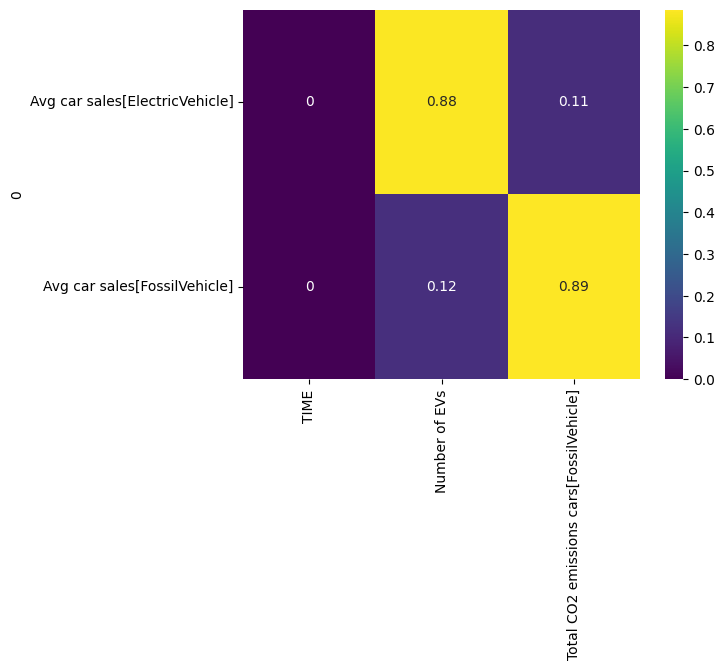

In [8]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()